In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [102]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [103]:
X, y = df_wine.iloc[:,1:], df_wine.iloc[:,0]

In [104]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [206]:
class PCA(object):
    def __init__(self):
        pass
    
    def transform(self, X, n_components):
        assert X.shape[1] >= n_components
        self.variance_explained_ = []
        self.eigen_value_ = []
        self.transformed_ = []
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        
        for i, m in enumerate(X.mean(axis = 0).tolist()):
            X[:,i] = X[:,i] - m
        e_value, e_vector = np.linalg.eig(np.cov(X))
        idx = np.argsort(e_value)[::-1][:n_components]
        
        for i in idx:
            self.eigen_value_.append(e_value[i])
            self.transformed_.append(e_vector[i])
        
        self.variance_explained_ = np.sum(self.eigen_value_) / np.sum(e_value)

        return self.transformed_
        

In [207]:
pca = PCA()

In [209]:
pca2 = pca.transform(X,2)

In [210]:
pca.transformed_

[array([-0.07559083+0.j        , -0.12383304+0.j        ,
         0.08124501+0.j        , -0.00123235+0.j        ,
         0.02252663+0.j        ,  0.01073506+0.j        ,
         0.08262166+0.j        ,  0.04074405+0.j        ,
        -0.16201363+0.j        , -0.02307037+0.j        ,
         0.04272411+0.j        , -0.04215863+0.j        ,
         0.02359665-0.03197593j,  0.02359665+0.03197593j,
         0.02076791+0.02011124j,  0.02076791-0.02011124j,
        -0.01303497-0.01027551j, -0.01303497+0.01027551j,
         0.12037447-0.05657554j,  0.12037447+0.05657554j,
        -0.07544932+0.004562j  , -0.07544932-0.004562j  ,
        -0.07242624+0.j        ,  0.00234318-0.10554167j,
         0.00234318+0.10554167j, -0.05231029+0.0115298j ,
        -0.05231029-0.0115298j , -0.03415453-0.0003682j ,
        -0.03415453+0.0003682j , -0.05842883+0.j        ,
         0.03888764-0.07774708j,  0.03888764+0.07774708j,
        -0.11297894+0.03348521j, -0.11297894-0.03348521j,
        -0.075

In [211]:
pca.variance_explained_

(0.9998312497586569+1.197777776408012e-32j)

In [212]:
pca.eigen_value_

[(1346044.3407951687+0j), (2320.898794543033+0j)]

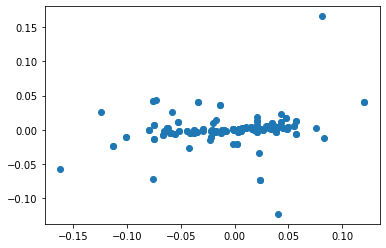

In [214]:
plt.scatter(pca2[0],pca2[1])